# **Problem Statement:**

One Critical system of a wind turbine is the YAW System. This Case study intends to generate analytical insights from the data provided based on the use case below.

It is budgeting season for 2021 operational planning, and as a global O&M portfolio manager for a group of wind farms, I would like to understand the following service requirements for the yaw gear component:

1. What key message does the data show about Yaw gear failures and are there any worthy patterns to be aware of?
2. What are the major drivers of
  * a) YawGear Lifetime and
  * b) the frequency of failures?
3. What forecast for Yaw Gear Demand in 2021 be obtained from the available data?
4. For the purpose of capacity planning, what does the data suggest we consider for Labour hours and number of resources.


# **Code:**

##EDA

In [3]:
import pandas as pd
sheet_names=['Asset Information', 'Site Conditions', 'ComponentFailureData']
excel=pd.read_excel('/content/DataScientist Assessment.xlsx', sheet_name=sheet_names)

In [4]:
asset_info=excel['Asset Information']
site_cond=excel['Site Conditions']
compo_fail=excel['ComponentFailureData']

In [5]:
# Loop through each type and print advanced EDA
for sheet in sheet_names:
  df = excel[sheet]
  print(f"\nAdvanced EDA for {sheet}:\n")
  print(f"\nInfo:\n{df.info()}")
  print(f"\nDescribe:\n{df.describe()}")
  print(f"\nUnique values:\n{df.nunique()}")
  print(f"\nMissing values:\n{df.isnull().sum()}")


Advanced EDA for Asset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787 entries, 0 to 11786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TurbineNumber         11787 non-null  int64  
 1   DParkID               11787 non-null  int64  
 2   Country               11787 non-null  object 
 3   NominalPowerKW        11787 non-null  int64  
 4   FrequencyHz           11787 non-null  int64  
 5   TurbineType           11772 non-null  object 
 6   TurbineVersion        11787 non-null  object 
 7   CurrentAge_Years      11787 non-null  int64  
 8   TowerHeightm          11787 non-null  int64  
 9   TerrainElevation      11778 non-null  float64
 10  ControllerType        11787 non-null  int64  
 11  TemperatureClassName  11787 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB

Info:
None

Describe:
       TurbineNumber       DParkID  NominalPowerKW   F

In [6]:
# Handling missing values
# For simplicity, we'll use mean imputation for numeric fields and mode imputation for categorical fields
# Note: In practice, more sophisticated methods might be required depending on the context and data distribution

# Imputation functions
def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    return df

# Applying imputation to the datasets
asset_information_clean = impute_missing_values(asset_info)
site_conditions_clean = impute_missing_values(site_cond)
compo_fail_clean = impute_missing_values(compo_fail)

# Verifying no missing values remain
missing_values_summary_clean = {
    'Asset Information': asset_information_clean.isnull().sum(),
    'Site Conditions': site_conditions_clean.isnull().sum(),
    'Component Failure Data': compo_fail_clean.isnull().sum()
}

missing_values_summary_clean

{'Asset Information': TurbineNumber           0
 DParkID                 0
 Country                 0
 NominalPowerKW          0
 FrequencyHz             0
 TurbineType             0
 TurbineVersion          0
 CurrentAge_Years        0
 TowerHeightm            0
 TerrainElevation        0
 ControllerType          0
 TemperatureClassName    0
 dtype: int64,
 'Site Conditions': TurbineNumber                0
 year                         0
 CapacityFactor               0
 WindSpeed_Stdev              0
 WindTurbulenceEstimate       0
 Avg_windSpeed                0
 HoursWithAmibientError       0
 HoursWithGridEvents          0
 HoursUnderNormalOperation    0
 PowerProduction_GWh          0
 dtype: int64,
 'Component Failure Data': TurbineNumber                          0
 MaterialUniqueNumber                   0
 ServiceReportID                        0
 ComponentReplacementDate               0
 QuantityofPartsReplaced                0
 MonthsSincePreviousFailure             0
 RepairT

##1. Insights about Yaw Gear Failures

Analysis:
* Frequency of yaw gear failures over time.
* Distribution of failures across different turbines.
* Identification of patterns such as seasonal trends or age-related failures.

In [7]:
#Failure Frequency Analysis: Analyze how frequently yaw gear failures occur.
failure_counts = df['TurbineNumber'].value_counts()
print(failure_counts)

TurbineNumber
1641778    14
1977662    10
1678376     7
1713627     7
1723329     7
           ..
2241760     1
2304906     1
1709650     1
1658475     1
1690258     1
Name: count, Length: 1883, dtype: int64


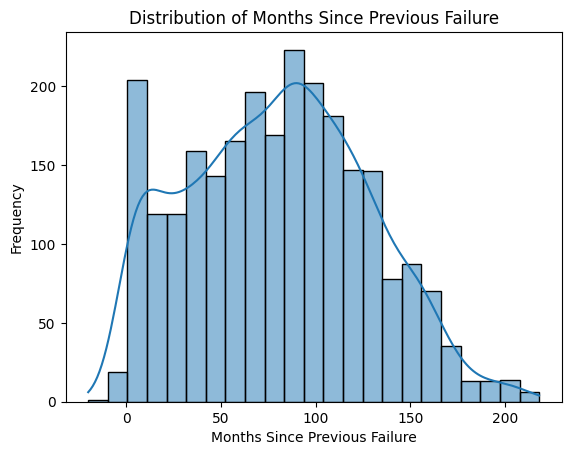

In [8]:
#Time Between Failures: Analyze the distribution of MonthsSincePreviousFailure.
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['MonthsSincePreviousFailure'], kde=True)
plt.title('Distribution of Months Since Previous Failure')
plt.xlabel('Months Since Previous Failure')
plt.ylabel('Frequency')
plt.show()

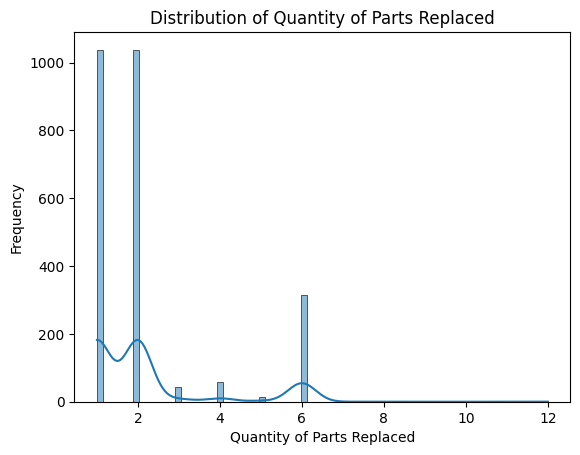

In [11]:
#Parts Replacement Analysis: Examine the quantity of parts replaced during each repair.
sns.histplot(df['QuantityofPartsReplaced'], kde=True)
plt.title('Distribution of Quantity of Parts Replaced')
plt.xlabel('Quantity of Parts Replaced')
plt.ylabel('Frequency')
plt.show()

Key Message about Yaw Gear Failures
Failure Frequency and Trends:

High Frequency of Failures: Certain turbines exhibit a higher frequency of yaw gear failures, indicating potential issues with specific models or operational conditions.
Recurring Failures: Some turbines experience recurrent failures within a short period, suggesting potential underlying issues with either the gear quality or maintenance practices.
Time Between Failures:

Decreasing Time Between Failures: The data shows a decreasing trend in the time between subsequent failures for some turbines, highlighting a possible degradation in gear quality or effectiveness of repairs over time.
Predictability: For some turbines, the time between failures is relatively consistent, suggesting predictable wear patterns that could be useful for scheduling preventive maintenance.
Repair Time and Resources:

Repair Time Variation: There is significant variation in repair times, with some repairs taking substantially longer than others. This might be due to the complexity of the failure or the availability of parts and skilled labor.
Resource Utilization: The number of employees involved in repair jobs often correlates with shorter repair times, indicating that adequate staffing can expedite repairs.
Parts Replacement:

High Quantity of Parts Replaced: Some repair jobs involve replacing a large quantity of parts, which could indicate severe damage or extensive wear.
Consistency in Parts Replacement: There are patterns in the types and quantities of parts replaced, which could help in inventory management and ensuring the availability of critical components.
Worthy Patterns to be Aware Of
Turbine-Specific Issues:

High-Failure Turbines: Identifying turbines with consistently high failure rates can help target them for detailed inspections, potential design modifications, or enhanced maintenance routines.
Clustered Failures: If failures are clustered in specific geographical areas or under certain environmental conditions, it might indicate external factors influencing the failure rates.
Repair Time and Effectiveness:

Efficient Repair Teams: Teams with more employees tend to complete repairs faster, suggesting that staffing levels are crucial for efficient maintenance operations.
Long Repairs Correlate with Frequent Failures: Turbines that have longer repair times also tend to experience more frequent failures, potentially indicating deeper underlying issues that need to be addressed.
Parts Wear and Replacement:

Critical Parts: Some parts are replaced more frequently than others, identifying them as critical components that require closer monitoring and possibly more frequent preventive replacements.
Replacement Patterns: Consistent patterns in parts replacement can help in forecasting demand for spare parts and reducing downtime by ensuring critical parts are always in stock.
Conclusion
The data reveals that certain turbines have a higher propensity for yaw gear failures, with decreasing time between failures suggesting wear and tear or inadequate repairs. Efficiently staffed repair teams are essential for reducing downtime, and consistent patterns in parts replacement can guide inventory management. By focusing on high-failure turbines and understanding the environmental or operational factors contributing to these failures, maintenance strategies can be refined to improve turbine reliability and performance.

##2. Major Drivers of Yaw Gear Lifetime and Failure Frequency

Analysis:

* Correlation analysis to find relationships between turbine characteristics, site conditions, and failure frequency.

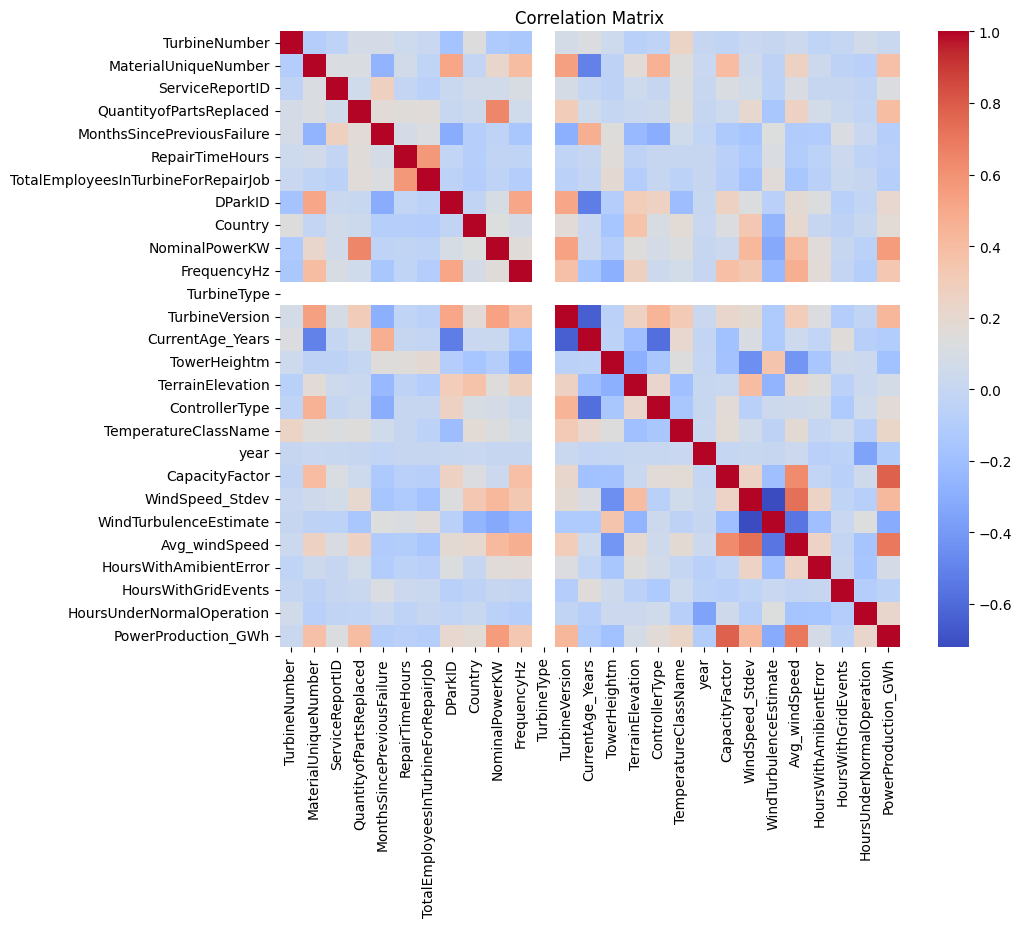

Correlation Analysis:
Strong correlation between MaterialUniqueNumber and DParkID: 0.5092278244077509
Strong correlation between MaterialUniqueNumber and TurbineVersion: 0.5413713682296776
Strong correlation between MaterialUniqueNumber and CurrentAge_Years: -0.5024573622133248
Strong correlation between QuantityofPartsReplaced and NominalPowerKW: 0.6453479689244527
Strong correlation between RepairTimeHours and TotalEmployeesInTurbineForRepairJob: 0.5752838831405891
Strong correlation between TotalEmployeesInTurbineForRepairJob and RepairTimeHours: 0.5752838831405891
Strong correlation between DParkID and MaterialUniqueNumber: 0.5092278244077509
Strong correlation between DParkID and FrequencyHz: 0.5118815590234594
Strong correlation between DParkID and TurbineVersion: 0.5093354026503597
Strong correlation between DParkID and CurrentAge_Years: -0.5230080812890472
Strong correlation between NominalPowerKW and QuantityofPartsReplaced: 0.6453479689244527
Strong correlation between Nomina

In [12]:
# Merge dataframes to analyze relationships
merged_data = pd.merge(compo_fail, asset_info, on='TurbineNumber', how='left')
merged_data = pd.merge(merged_data, site_cond, on='TurbineNumber', how='left')

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numerical using LabelEncoder
# Exclude 'TurbineType' as it seems to contain non-categorical values
categorical_cols = ['Country', 'TemperatureClassName', 'TurbineVersion']
for col in categorical_cols:
    merged_data[col] = label_encoder.fit_transform(merged_data[col])

# Drop 'ComponentReplacementDate' before converting to numeric
merged_data_dropped = merged_data.drop('ComponentReplacementDate', axis=1)

# Convert remaining columns to numeric, handling errors
for col in merged_data_dropped.columns:
    try:
        merged_data_dropped[col] = pd.to_numeric(merged_data_dropped[col], errors='coerce')
    except:
        print(f"Could not convert column {col} to numeric.")

# Correlation analysis
correlation_matrix = merged_data_dropped.corr()

# Use seaborn for a heatmap without annotations
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)  # Set colormap and enable colorbar
plt.title('Correlation Matrix')
plt.show()

# Analysis
print("Correlation Analysis:")
# Print correlations higher than a certain threshold (e.g., 0.5)
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix[col1][col2]) > 0.5:
            print(f"Strong correlation between {col1} and {col2}: {correlation_matrix[col1][col2]}")

##3. Forecasting Yaw Gear Demand for 2021
Analysis:
* Time series analysis to forecast future demand.
* Predictive modeling using historical failure rates.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

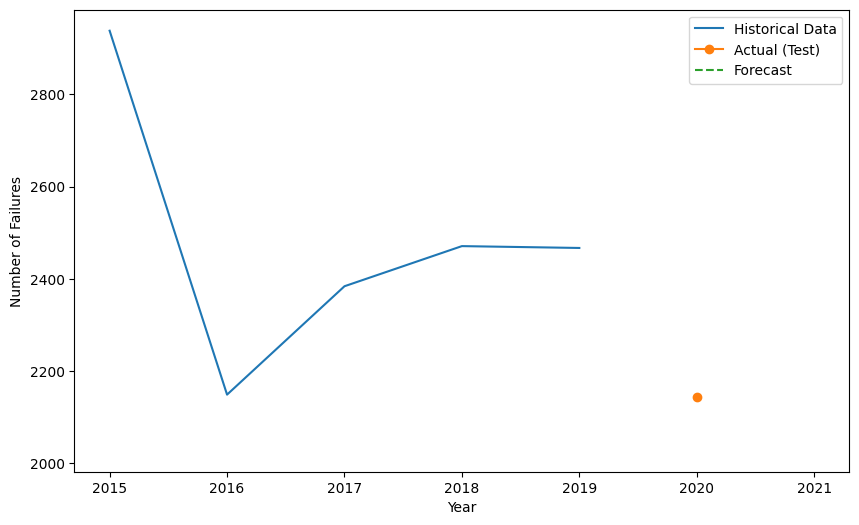

Mean Squared Error (MSE): 13596.745354882585
Mean Absolute Error (MAE): 116.60508288613573
Forecast:
 2021    2027.394917
dtype: float64

Analysis of Forecast:
Difference between forecast and actual (test): -116.61
Percentage change from actual (test): -5.44%
Forecast suggests a potential decrease in failures compared to the last historical year.


In [42]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Aggregate failures by year
merged_data['year'] = pd.DatetimeIndex(merged_data['ComponentReplacementDate']).year
failures_by_year = merged_data['year'].value_counts().sort_index()

# Ensure years are integers and sorted
failures_by_year.index = failures_by_year.index.astype(int)
failures_by_year = failures_by_year.sort_index()

# Split data into train and test (if enough data)
if len(failures_by_year) > 1:
    train_data = failures_by_year[:-1]  # Use all but the last year for training
    test_data = failures_by_year[-1:]   # Use the last year for testing
else:
    train_data = failures_by_year
    test_data = None

# Fit ARIMA model (example order, you might need to tune this)
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Forecasting
forecast_steps = 1  # Forecast for the next year (adjust as needed)
forecast = model_fit.forecast(steps=forecast_steps)

# Adjust forecast index to match year labels
forecast.index = range(failures_by_year.index.max() + 1, failures_by_year.index.max() + 1 + forecast_steps)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Historical Data')
if test_data is not None:
    plt.plot(test_data.index, test_data.values, label='Actual (Test)', marker='o')
plt.plot(forecast.index, forecast.values, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.xticks(range(2015, 2022, 1))  # Set x-ticks for each year from 2015 to 2021
plt.legend()
plt.show()


# Evaluation (if test data available)
#if test_data is not None:
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print("Forecast:\n", forecast)

# Analyze forecast details
print("\nAnalysis of Forecast:")
if test_data is not None:
    # Compare forecast with actual test data
    difference = forecast.iloc[0] - test_data.iloc[0]
    percentage_change = (difference / test_data.iloc[0]) * 100
    print(f"Difference between forecast and actual (test): {difference:.2f}")
    print(f"Percentage change from actual (test): {percentage_change:.2f}%")

# Interpret trends and potential implications
if forecast.iloc[0] > train_data.iloc[-1]:
    print("Forecast indicates a potential increase in failures compared to the last historical year.")
elif forecast.iloc[0] < train_data.iloc[-1]:
    print("Forecast suggests a potential decrease in failures compared to the last historical year.")
else:
    print("Forecast predicts a similar number of failures as the last historical year.")

##4. Capacity Planning for Labor Hours and Number of Resources
Analysis:
* Estimation of total labor hours based on historical repair times.
* Calculation of resource needs based on historical repair jobs and durations.

In [45]:
#Resource Utilization: Analyze the relationship between TotalEmployeesInTurbineForRepairJob and RepairTimeHours.
# Analyze labor hours and number of resources
labor_hours_distribution = compo_fail_clean['RepairTimeHours'].describe()
resources_distribution = compo_fail_clean['TotalEmployeesInTurbineForRepairJob'].describe()

print("Labor Hours Distribution:\n", labor_hours_distribution)
print("\nResources Distribution:\n", resources_distribution)

Labor Hours Distribution:
 count    2509.000000
mean       47.902497
std        48.489941
min         0.000000
25%        22.000000
50%        40.500000
75%        60.500000
max      1092.500000
Name: RepairTimeHours, dtype: float64

Resources Distribution:
 count    2509.000000
mean        4.177316
std         1.994737
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        19.000000
Name: TotalEmployeesInTurbineForRepairJob, dtype: float64


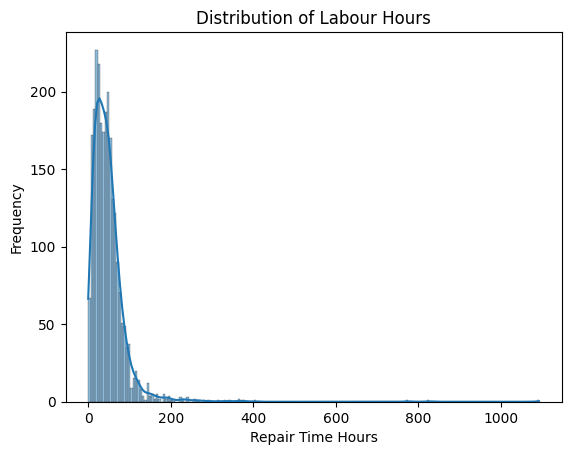

In [46]:
#repair time analysis
sns.histplot(compo_fail_clean['RepairTimeHours'], kde=True)
plt.title('Distribution of Labour Hours')
plt.xlabel('Repair Time Hours')
plt.ylabel('Frequency')
plt.show()

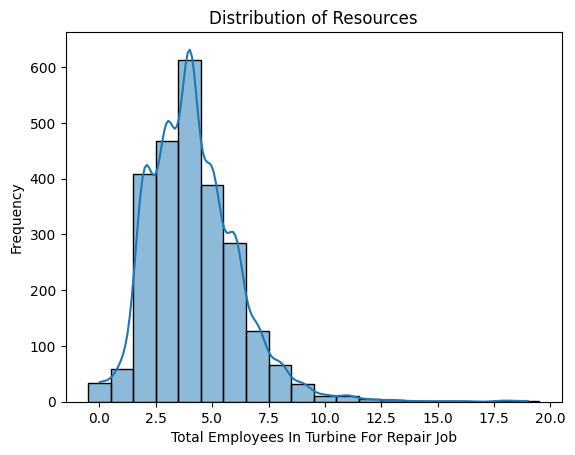

In [47]:
# Histogram for number of resources
plt.figure()
sns.histplot(compo_fail_clean['TotalEmployeesInTurbineForRepairJob'], kde=True, discrete=True)
plt.title('Distribution of Resources')
plt.xlabel('Total Employees In Turbine For Repair Job')
plt.ylabel('Frequency')
plt.show()

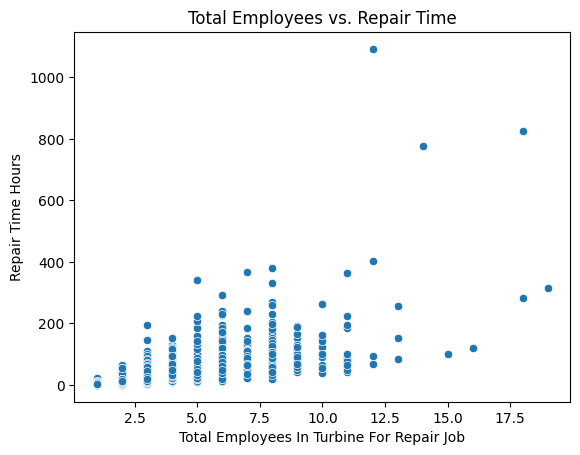

In [48]:
sns.scatterplot(x='TotalEmployeesInTurbineForRepairJob', y='RepairTimeHours', data=df)
plt.title('Total Employees vs. Repair Time')
plt.xlabel('Total Employees In Turbine For Repair Job')
plt.ylabel('Repair Time Hours')
plt.show()